O pandas nos fornece uma série de funcionalidades de leitura de dados, pros mais diversos formatos estruturais de dados, experimente a auto-completação de pd.read_<TAB>, entre eles estão:

pd.read_csv, para ler arquivos .csv, formato comum de armazenar dados de tabelas<br>
pd.read_xlsx, para ler arquivos Excel .xlsx, é necessário instalar uma biblioteca adicional pra esta funcionalidade.<br>
pd.read_html, para ler tabelas diretamente de um website


##Tratando os dados

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv("dados.csv")
df.head()
#df recebe os dados do arquivos dados.csv e df.head() exibe as primeiras linhas da tabela

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,12031.25
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


In [68]:
df.tail()
#Exibi a tabela de baixo pra cima na ordem que foi recebida

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
1992,1080,3,1.0,1.0,80,Tijuca,680000,8500.00
1993,750,3,0.0,1.0,82,Tijuca,650000,7926.83
1994,700,3,1.0,1.0,100,Tijuca,629900,6299.00
1995,1850,3,1.0,2.0,166,Tijuca,1600000,9638.55
1996,800,3,1.0,1.0,107,Tijuca,540000,5046.73


In [69]:
df['bairro'].unique()
#Retorna todos os objetos unicos na coluna indicada

array(['Botafogo', 'Copacabana', 'Gávea', 'Grajaú', 'Ipanema', 'Leblon',
       'Tijuca'], dtype=object)

In [70]:
df['bairro'].value_counts()
#Retorna a contagem de vezes que todos os objetos apareceram na coluna indicada

Copacabana    346
Tijuca        341
Botafogo      307
Ipanema       281
Leblon        280
Grajaú        237
Gávea         205
Name: bairro, dtype: int64

In [71]:
df['bairro'].value_counts(normalize=True)
#Retorna os valores normalizados de cada objeto

Copacabana    0.173260
Tijuca        0.170756
Botafogo      0.153731
Ipanema       0.140711
Leblon        0.140210
Grajaú        0.118678
Gávea         0.102654
Name: bairro, dtype: float64

In [72]:
df.groupby(by='bairro',sort=True).mean()
#Agrapamento de informações pelo bairro e suas medias para cada atributo

,condominio,quartos,suites,vagas,area,preco,pm2
bairro,,,,,,,
Botafogo,914.475570,2.107492,1.048860,1.159609,83.837134,1.010614e+06,12034.486189
Copacabana,991.861272,2.101156,1.034682,1.080925,101.855491,1.216344e+06,11965.298699
Grajaú,619.940928,2.097046,0.970464,1.130802,79.949367,4.788869e+05,6145.624473
Gávea,985.234146,2.058537,1.029268,1.200000,88.497561,1.454571e+06,16511.582780
Ipanema,1357.120996,2.181495,1.192171,1.220641,100.615658,2.033096e+06,19738.407794
Leblon,1260.010714,2.207143,1.064286,1.164286,91.832143,1.946193e+06,20761.351036
Tijuca,681.175953,2.131965,0.944282,1.143695,81.457478,5.750780e+05,7149.804985


In [73]:
df.groupby('bairro').mean()['pm2'].sort_values()
#Metodo para extrair somente as médias de preços por bairro de maneira ordenada

bairro
Grajaú         6145.624473
Tijuca         7149.804985
Copacabana    11965.298699
Botafogo      12034.486189
Gávea         16511.582780
Ipanema       19738.407794
Leblon        20761.351036
Name: pm2, dtype: float64

In [74]:
df['bairro'].apply(lambda x: x[:4]).head()
#Lambda atribui uma redução ao nome dos bairros, os quais serão indicados pelo fatiamento dos mesmos.

0    Bota
1    Bota
2    Bota
3    Bota
4    Bota
Name: bairro, dtype: object

In [75]:
df2 = df.head()
df2 = df2.replace({'pm2': {12031.25: np.nan}})
df2
#Utiliza-se o replace para alterar um elemento dentro da coluna indicada.

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,NaN
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


In [76]:
df2.dropna()
#Função que descarta todas as linhas que não contem valor, no caso contém NaN

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


In [77]:
df2.fillna(99)
#Preenche todos os valores NaN pelo indicado na função

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,99.00
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


In [78]:
df2.isna()
#indica quais valores de um dataframe são tipo NaN e quais não são

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


##Visualizando dados

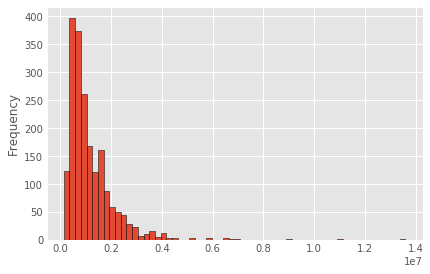

In [79]:
df['preco'].plot.hist(bins=60, edgecolor='black')
#Plota um gráfico de barra, com 60 divisões e borda preta.
#O grafico informa no eixo x o preço e em y a frequencia de vezes que o preço apareceu.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2c82540b8>],
      dtype=object)

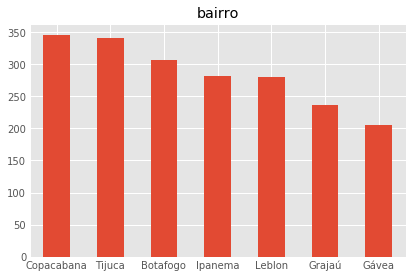

In [80]:
df['bairro'].value_counts().plot.bar(y='speed', rot=0, subplots=True)
#Fornece um grafico de barra indicando a frequencia em que os barrios aparecem no dataframe

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


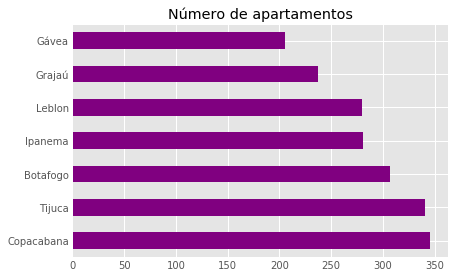

In [81]:
df["bairro"].value_counts().plot.barh(title="Número de apartamentos", colors='purple')


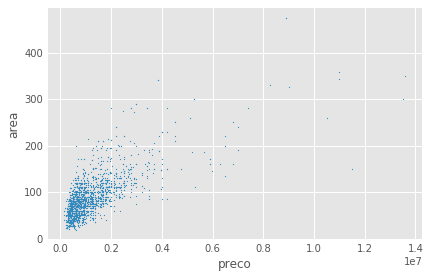

In [82]:
plt.style.use('ggplot') #Estilo do grafico
df.plot.scatter(x='preco', y='area', s=.5) # s=.5 trata sobre o tamanho dos plots
#Recebe como distribuição os valores do dataframe em preço por area

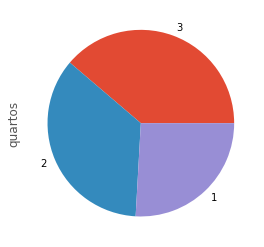

In [83]:
df["quartos"].value_counts().plot.pie()


In [0]:
df.to_csv("precos.csv")
#salva o datafram tratado em um novo arquivo.